In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [3]:
type1 = pd.read_csv('type1_diabetes.csv')

In [4]:
type1

,HYPEV,CHLEV,CHDEV,ANGEV,MIEV,HRTEV,STREV,EPHEV,COPDEV,AASMEV,...,ULCCOLEV,CANEV,SINYR,CBRCHYR,KIDWKYR,LIVYR,ARTH1,VIM_GLEV,FLA1AR,Age_Group
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,<10
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,<10
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,10-20
3,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,30-40
4,1,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,40+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,40+
371,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10-20
372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,<10
373,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,40+


In [8]:
complications = ['HYPEV', 'CHLEV', 'CHDEV', 'ANGEV', 'MIEV', 'HRTEV', 'STREV', 'EPHEV',
                  'COPDEV', 'AASMEV', 'ULCEV', 'ULCCOLEV', 'CANEV', 'SINYR', 'CBRCHYR', 
                  'KIDWKYR', 'LIVYR', 'ARTH1', 'VIM_GLEV', 'FLA1AR']

In [8]:
# Set custom order for Age_Group to ensure <10 is on top
age_order = ['<10', '10-20', '20-30', '30-40', '40+']
type1['Age_Group'] = pd.Categorical(type1['Age_Group'], categories=age_order, ordered=True)

# Calculate the mean complication rates for each age group
complication_average = type1.groupby('Age_Group')[complications].mean()

complication_average


,HYPEV,CHLEV,CHDEV,ANGEV,MIEV,HRTEV,STREV,EPHEV,COPDEV,AASMEV,ULCEV,ULCCOLEV,CANEV,SINYR,CBRCHYR,KIDWKYR,LIVYR,ARTH1,VIM_GLEV,FLA1AR
Age_Group,,,,,,,,,,,,,,,,,,,,
<10,0.421053,0.421053,0.105263,0.105263,0.078947,0.131579,0.052632,0.052632,0.026316,0.210526,0.131579,0.000000,0.052632,0.236842,0.052632,0.105263,0.026316,0.236842,0.000000,0.394737
10-20,0.340426,0.404255,0.148936,0.106383,0.106383,0.127660,0.148936,0.000000,0.021277,0.276596,0.042553,0.021277,0.106383,0.276596,0.063830,0.106383,0.000000,0.297872,0.063830,0.553191
20-30,0.481481,0.537037,0.111111,0.055556,0.092593,0.148148,0.037037,0.037037,0.037037,0.296296,0.074074,0.000000,0.055556,0.148148,0.037037,0.074074,0.018519,0.222222,0.055556,0.518519
30-40,0.630435,0.478261,0.021739,0.021739,0.021739,0.130435,0.108696,0.065217,0.043478,0.239130,0.086957,0.000000,0.043478,0.086957,0.086957,0.043478,0.000000,0.456522,0.043478,0.543478
40+,0.805263,0.615789,0.189474,0.052632,0.126316,0.194737,0.115789,0.052632,0.147368,0.121053,0.126316,0.005263,0.163158,0.157895,0.078947,0.078947,0.031579,0.494737,0.084211,0.742105


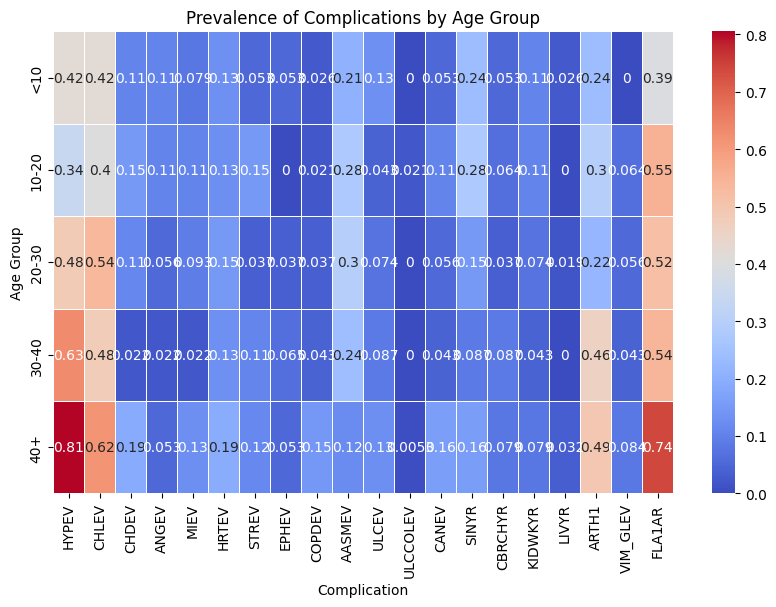

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(complication_average, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Prevalence of Complications by Age Group')
plt.xlabel('Complication')
plt.ylabel('Age Group')
plt.show()

#### Total Number of Complications for Each Age Group

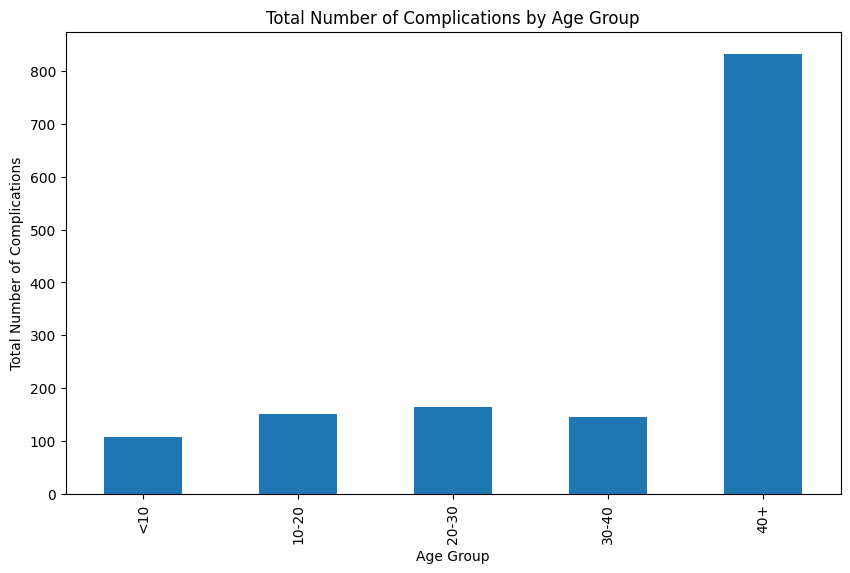

In [19]:
# Step 1: Sum the total number of complications for each age group
total_complications = type1.groupby('Age_Group')[complications].sum().sum(axis=1)

# Step 2: Plot the total number of complications as a bar chart
total_complications.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Total Number of Complications by Age Group')
plt.ylabel('Total Number of Complications')
plt.xlabel('Age Group')

# Show the plot
plt.show()


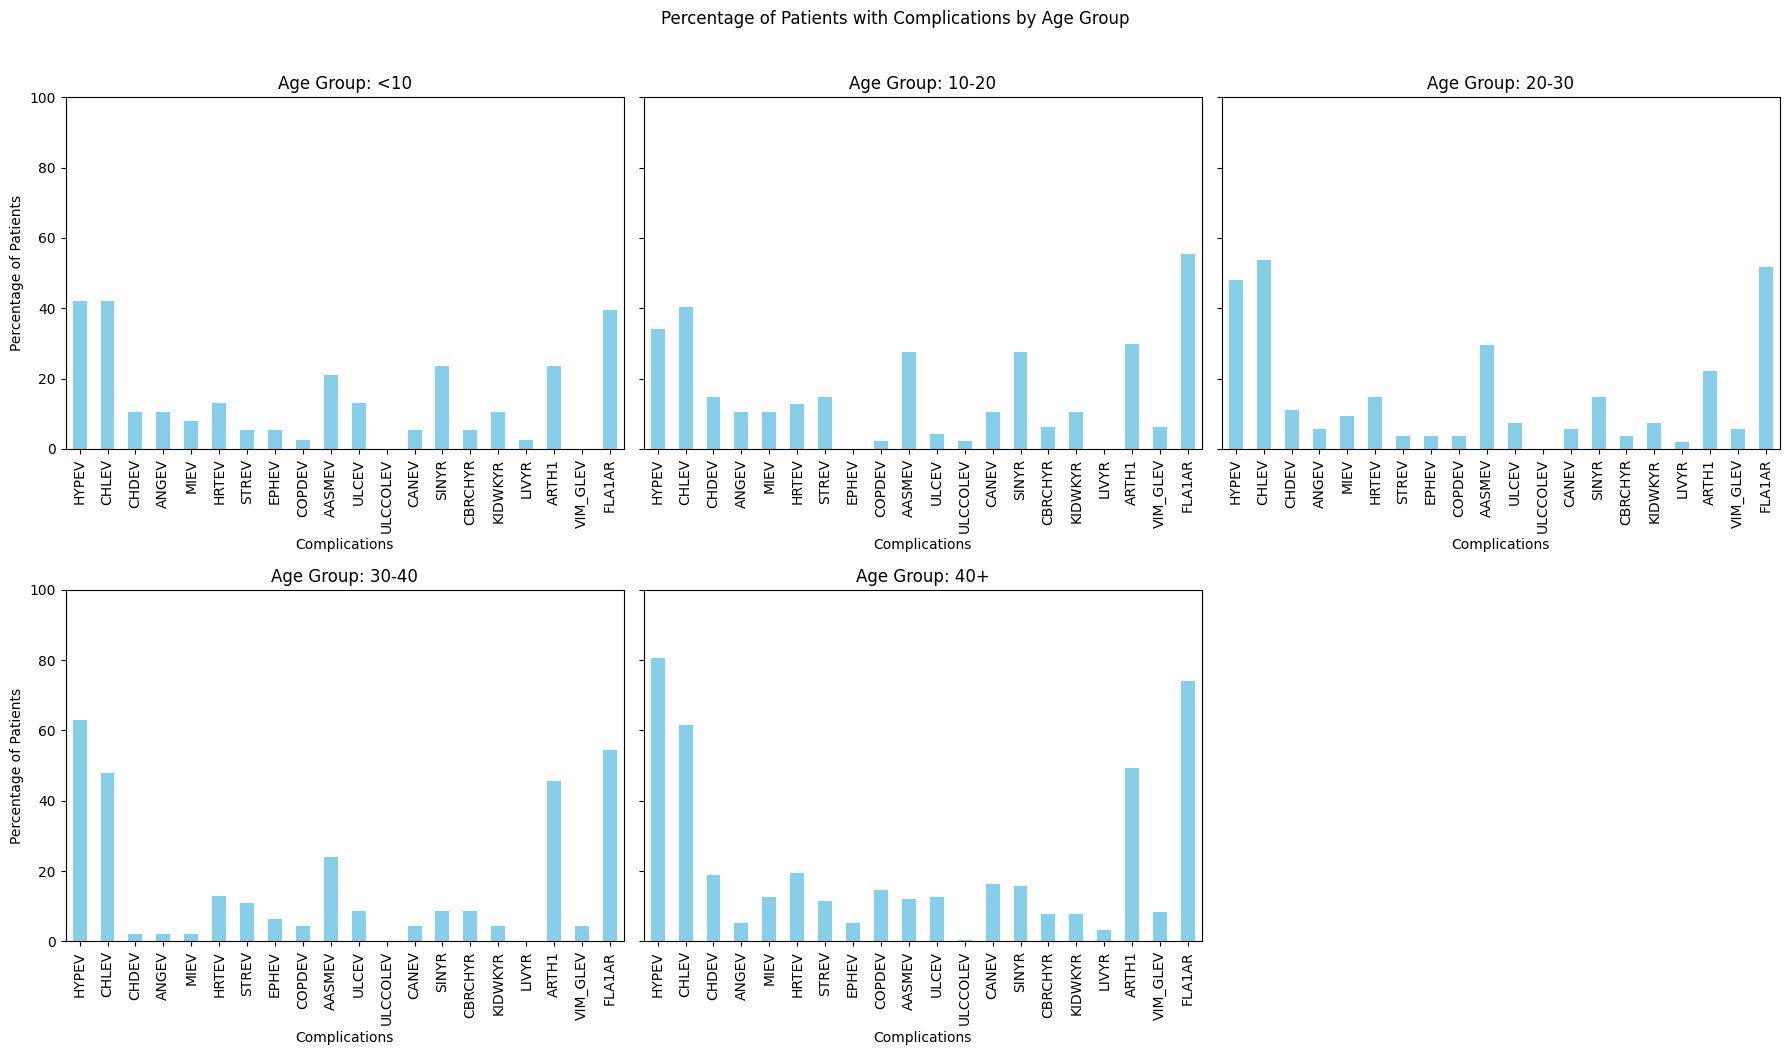

In [24]:
# Step 1: Calculate the total number of patients in each age group
group_sizes = type1['Age_Group'].value_counts()

# Step 2: Calculate the sum of patients with each complication by age group
complication_sums = type1.groupby('Age_Group')[complications].sum()

# Step 3: Calculate the percentage of patients with each complication in each age group
complication_percentages = complication_sums.div(group_sizes, axis=0) * 100  # Multiply by 100 for percentage

# Step 4: Create subplots with a 3x2 layout
age_groups = complication_percentages.index
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Step 5: Plot each age group's percentage of complications in a separate subplot
for i, age_group in enumerate(age_groups):
    complication_percentages.loc[age_group].plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'Age Group: {age_group}')
    axes[i].set_xlabel('Complications')
    axes[i].set_ylim(0, 100)  # Limit y-axis to 100% for clear comparison
    if i % 3 == 0:  # Set y-label only for the first column
        axes[i].set_ylabel('Percentage of Patients')

# Hide any extra empty subplots (if there are fewer than 6 age groups)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.suptitle('Percentage of Patients with Complications by Age Group', y=1.05)
plt.show()


We notice that there is a few complications that are consistently higher across all age groups.

In [28]:
# Loop through each complication and perform the Chi-square test
for comp in complications:
    # Create a contingency table for Age_Group and the complication
    contingency_table = pd.crosstab(type1['Age_Group'], type1[comp])
    
    # Perform the Chi-square test
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    
    # Print the p-value for the Chi-square test
    print(f'{comp}: Chi-square test p-value = {p:.4f}')


HYPEV: Chi-square test p-value = 0.0000
CHLEV: Chi-square test p-value = 0.0295
CHDEV: Chi-square test p-value = 0.0456
ANGEV: Chi-square test p-value = 0.3468
MIEV: Chi-square test p-value = 0.3117
HRTEV: Chi-square test p-value = 0.6430
STREV: Chi-square test p-value = 0.2798
EPHEV: Chi-square test p-value = 0.5547
COPDEV: Chi-square test p-value = 0.0043
AASMEV: Chi-square test p-value = 0.0114
ULCEV: Chi-square test p-value = 0.4208
ULCCOLEV: Chi-square test p-value = 0.5591
CANEV: Chi-square test p-value = 0.0400
SINYR: Chi-square test p-value = 0.1077
CBRCHYR: Chi-square test p-value = 0.8172
KIDWKYR: Chi-square test p-value = 0.8023
LIVYR: Chi-square test p-value = 0.5498
ARTH1: Chi-square test p-value = 0.0003
VIM_GLEV: Chi-square test p-value = 0.3692
FLA1AR: Chi-square test p-value = 0.0001


The Chi-square tests of independence revealed significant associations between certain complications and age groups. For example, **HYPEV** (hypertension) had a p-value of 0.0000, indicating a very strong association between age groups and hypertension. This suggests that the prevalence of hypertension varies significantly across different age groups, with some age groups being much more likely to experience hypertension. Similarly, **FLA1AR** (food allergies) had a p-value of 0.0001, also showing a significant relationship with age groups. On the other hand, some complications, such as **HRTEV** (heart disease, p = 0.6430) and **EPHEV** (emphysema, p = 0.5547), had high p-values, indicating that these complications occur at similar rates across all age groups, with no statistically significant difference between them. These results highlight how certain health conditions are more prevalent in specific age groups, while others are more evenly distributed.

### Exploratory Analysis for Type 2 Diabetes

In [4]:
type2 = pd.read_csv('type2_diabetes.csv')
type2

,HYPEV,CHLEV,CHDEV,ANGEV,MIEV,HRTEV,STREV,EPHEV,COPDEV,AASMEV,...,ULCCOLEV,CANEV,SINYR,CBRCHYR,KIDWKYR,LIVYR,ARTH1,VIM_GLEV,FLA1AR,Age_Group
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20-30
1,1,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,40+
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,40+
3,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,40+
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,40+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2766,0,1,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,40+
2767,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,40+
2768,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,40+
2769,1,1,1,0,1,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,40+


In [12]:
# Set custom order for Age_Group to ensure <10 is on top
age_order = ['<10', '10-20', '20-30', '30-40', '40+']
type2['Age_Group'] = pd.Categorical(type2['Age_Group'], categories=age_order, ordered=True)

# Calculate the mean complication rates for each age group
complication_average2 = type2.groupby('Age_Group')[complications].mean()

complication_average2


,HYPEV,CHLEV,CHDEV,ANGEV,MIEV,HRTEV,STREV,EPHEV,COPDEV,AASMEV,ULCEV,ULCCOLEV,CANEV,SINYR,CBRCHYR,KIDWKYR,LIVYR,ARTH1,VIM_GLEV,FLA1AR
Age_Group,,,,,,,,,,,,,,,,,,,,
<10,0.795918,0.714286,0.122449,0.061224,0.122449,0.183673,0.040816,0.102041,0.122449,0.183673,0.142857,0.040816,0.081633,0.224490,0.163265,0.040816,0.061224,0.530612,0.040816,0.734694
10-20,0.709677,0.629032,0.193548,0.064516,0.129032,0.209677,0.080645,0.032258,0.112903,0.258065,0.145161,0.000000,0.096774,0.193548,0.161290,0.112903,0.048387,0.548387,0.064516,0.725806
20-30,0.664671,0.556886,0.119760,0.071856,0.101796,0.125749,0.065868,0.023952,0.071856,0.251497,0.077844,0.047904,0.107784,0.143713,0.101796,0.101796,0.065868,0.485030,0.077844,0.748503
30-40,0.724390,0.658537,0.153659,0.070732,0.075610,0.192683,0.107317,0.036585,0.100000,0.226829,0.119512,0.024390,0.156098,0.182927,0.090244,0.102439,0.048780,0.480488,0.063415,0.748780
40+,0.795967,0.722996,0.170427,0.078253,0.132501,0.194431,0.091695,0.048488,0.106577,0.171867,0.116179,0.023044,0.226116,0.169947,0.077292,0.086414,0.055209,0.556889,0.085934,0.752280


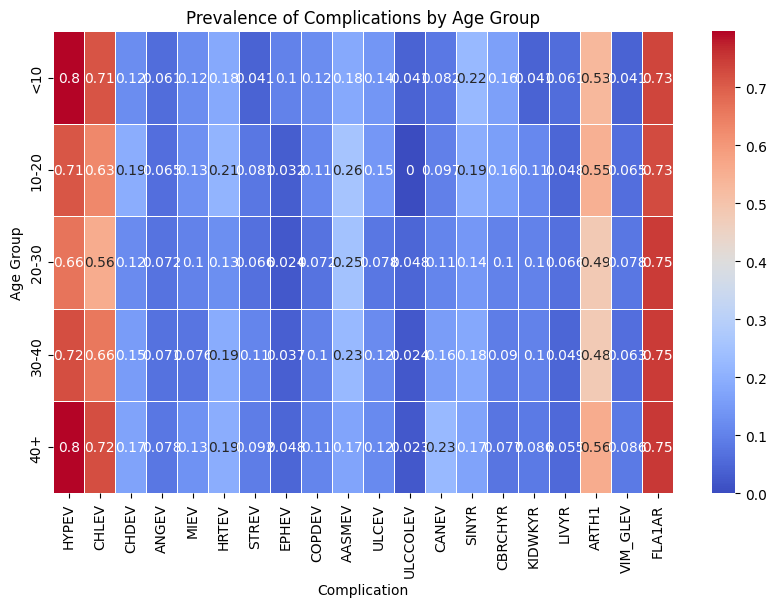

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(complication_average2, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Prevalence of Complications by Age Group')
plt.xlabel('Complication')
plt.ylabel('Age Group')
plt.show()

We can again see the same complications which were more prevalent with Type 1 diabetics is the same with type 2 pateints. 

#### Total Number of Complications per Age Group

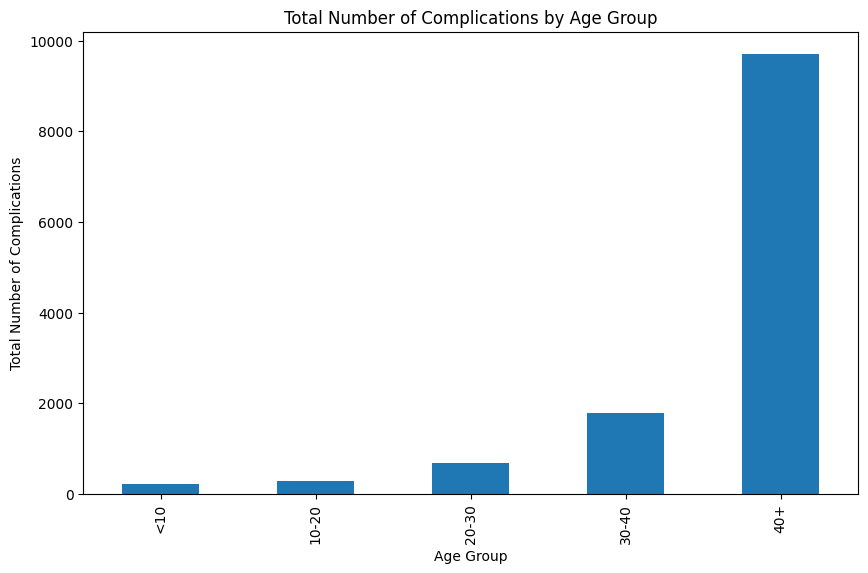

In [14]:
# Step 1: Sum the total number of complications for each age group
total_complications = type2.groupby('Age_Group')[complications].sum().sum(axis=1)

# Step 2: Plot the total number of complications as a bar chart
total_complications.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Total Number of Complications by Age Group')
plt.ylabel('Total Number of Complications')
plt.xlabel('Age Group')

# Show the plot
plt.show()


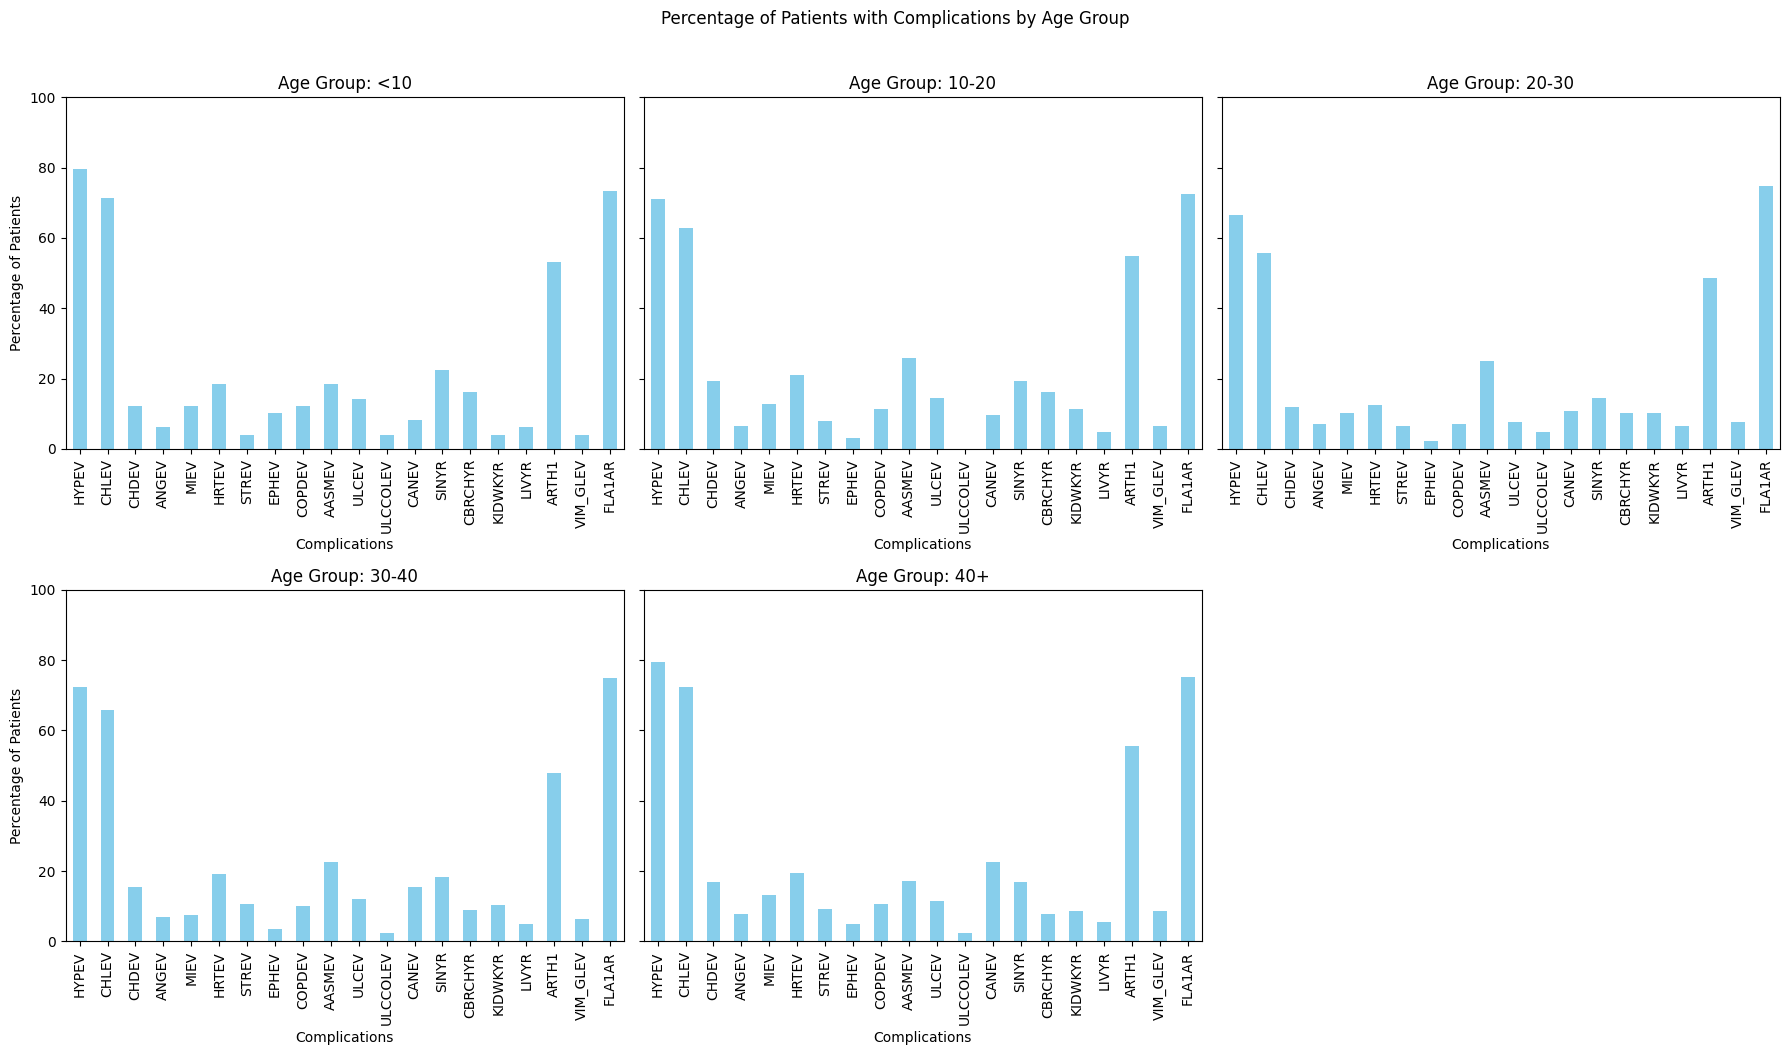

In [16]:
# Step 1: Calculate the total number of patients in each age group
group_sizes = type2['Age_Group'].value_counts()

# Step 2: Calculate the sum of patients with each complication by age group
complication_sums = type2.groupby('Age_Group')[complications].sum()

# Step 3: Calculate the percentage of patients with each complication in each age group
complication_percentages = complication_sums.div(group_sizes, axis=0) * 100  # Multiply by 100 for percentage

# Step 4: Create subplots with a 3x2 layout
age_groups = complication_percentages.index
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Step 5: Plot each age group's percentage of complications in a separate subplot
for i, age_group in enumerate(age_groups):
    complication_percentages.loc[age_group].plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'Age Group: {age_group}')
    axes[i].set_xlabel('Complications')
    axes[i].set_ylim(0, 100)  # Limit y-axis to 100% for clear comparison
    if i % 3 == 0:  # Set y-label only for the first column
        axes[i].set_ylabel('Percentage of Patients')

# Hide any extra empty subplots (if there are fewer than 6 age groups)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.suptitle('Percentage of Patients with Complications by Age Group', y=1.05)
plt.show()


#### Chi-square test

In [17]:
# Loop through each complication and perform the Chi-square test
for comp in complications:
    # Create a contingency table for Age_Group and the complication
    contingency_table = pd.crosstab(type2['Age_Group'], type2[comp])
    
    # Perform the Chi-square test
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    
    # Print the p-value for the Chi-square test
    print(f'{comp}: Chi-square test p-value = {p:.4f}')


HYPEV: Chi-square test p-value = 0.0001
CHLEV: Chi-square test p-value = 0.0000
CHDEV: Chi-square test p-value = 0.3638
ANGEV: Chi-square test p-value = 0.9608
MIEV: Chi-square test p-value = 0.0260
HRTEV: Chi-square test p-value = 0.2947
STREV: Chi-square test p-value = 0.3843
EPHEV: Chi-square test p-value = 0.1487
COPDEV: Chi-square test p-value = 0.6801
AASMEV: Chi-square test p-value = 0.0071
ULCEV: Chi-square test p-value = 0.5113
ULCCOLEV: Chi-square test p-value = 0.1914
CANEV: Chi-square test p-value = 0.0000
SINYR: Chi-square test p-value = 0.6455
CBRCHYR: Chi-square test p-value = 0.0275
KIDWKYR: Chi-square test p-value = 0.5189
LIVYR: Chi-square test p-value = 0.9416
ARTH1: Chi-square test p-value = 0.0356
VIM_GLEV: Chi-square test p-value = 0.4479
FLA1AR: Chi-square test p-value = 0.9890
